<a href="https://colab.research.google.com/github/KailiangGu/handwritting/blob/master/Handwritting_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 解压文件

**把处理过的压缩文件从google drive上解压到当前路径**

In [2]:
!pip install patool

     |████████████████████████████████| 81kB 3.7MB/s 


In [3]:
import patoolib
file_name = "/content/drive/My Drive/Colab_Notebooks/train.part1.rar"
patoolib.extract_archive(file_name, outdir="./Data")


patool: Extracting /content/drive/My Drive/Colab_Notebooks/train.part1.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/Colab_Notebooks/train.part1.rar"
patool:     with cwd='./Data'
patool: ... /content/drive/My Drive/Colab_Notebooks/train.part1.rar extracted to `./Data'.


'./Data'

In [4]:
file_name = "/content/drive/My Drive/Colab_Notebooks/test.tar"
patoolib.extract_archive(file_name, outdir="./Data")
print("Done")

patool: Extracting /content/drive/My Drive/Colab_Notebooks/test.tar ...
patool: running /bin/tar --extract --file "/content/drive/My Drive/Colab_Notebooks/test.tar" --directory ./Data
patool: ... /content/drive/My Drive/Colab_Notebooks/test.tar extracted to `./Data'.
Done


# 处理数据

**读取图片的路径，生成对应的Lable_to_index字典**

**由于提供了train + test两个文件夹的图片，在这里我将它们合并为一个大的数据集，之后会按8：1：1的比例再分割为train + val + test数据集**


Data
895035
['Data/train/00097/705342.png', 'Data/train/02946/540000.png', 'Data/train/02634/137450.png', 'Data/train/01066/158281.png', 'Data/train/01899/343062.png', 'Data/train/00800/258304.png', 'Data/train/00712/35724.png', 'Data/train/03444/355004.png', 'Data/train/00174/864867.png', 'Data/train/02759/255149.png']


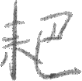

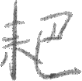

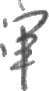

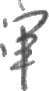

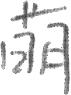

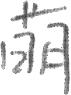

['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042', '00043', '00044', '00045', '00046', '00047', '00048', '00049', '00050', '00051', '00052', '00053', '00054', '00055', '00056', '00057', '00058', '00059', '00060', '00061', '00062', '00063', '00064', '00065', '00066', '00067', '00068', '00069', '00070', '00071', '00072', '00073', '00074', '00075', '00076', '00077', '00078', '00079', '00080', '00081', '00082', '00083', '00084', '00085', '00086', '00087', '00088', '00089', '00090', '00091', '00092', '00093', '00094', '00095', '00096', '00097', '00098', '00099', '00100', '00101', '00102', '00103', '00104', '00105', '00106', '00107', '00108', '00109', '00110', 

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import pathlib
import random
import IPython.display as display
from IPython.display import Image
import pickle

AUTOTUNE = tf.data.experimental.AUTOTUNE

data_root = pathlib.Path("./Data")

print(data_root)


all_image_paths = list(data_root.glob('train/*/*')) 
#all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

val_image_paths = list(data_root.glob('test/*/*'))
val_image_paths = [str(path) for path in val_image_paths]

image_count = len(all_image_paths)
print(image_count)

print(all_image_paths[:10])

import os
#
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  image = Image(image_path)
  display.display(image)

label_names = sorted(item.name for item in data_root.glob('train/*/') if item.is_dir())
print(label_names)

label_to_index = dict((name, index) for index, name in enumerate(label_names))
print(label_to_index)

char_dict = pickle.load(open( "./Data/char_dict", "rb" ))
chart_dict = {y:x for x,y in char_dict.items()}
print(chart_dict)

all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]
val_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in val_image_paths]                    

print("First 10 labels indices: ", all_image_labels[:10])


img_path = all_image_paths[1]
print(img_path)
img_raw = tf.io.read_file(img_path)
images_content = tf.io.read_file(img_path)
images_tensor = tf.convert_to_tensor(images_content, dtype=tf.string)
img_tensor = tf.image.decode_image(images_content)



print(img_tensor.shape)
print(img_tensor.dtype)


# 简易方程
**处理文件用到的一些小方程**


In [6]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [192, 192])
  image /= 255.0  # normalize to [0,1] range

  return image

def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

**检验方程**

仍



/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20173 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20173 missing from current font.
  font.set_text(s, 0, flags=flags)


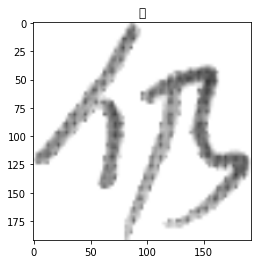

In [7]:
import matplotlib.pyplot as plt

image_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(image_path))
plt.grid(False)
plt.title(chart_dict[int(label_names[label])].title())
print(chart_dict[int(label_names[label])])
print()

Plt 无法显示中文

字符对应正确


In [8]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
vail_path_ds = tf.data.Dataset.from_tensor_slices(val_image_paths)
print(path_ds)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
val_image_ds = vail_path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

<TensorSliceDataset shapes: (), types: tf.string>


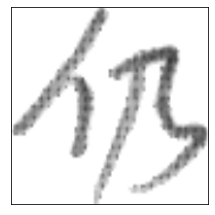

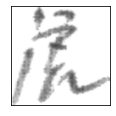

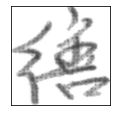

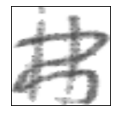

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
  plt.subplot(2,2,n+1)
  plt.imshow(image)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [10]:
image_label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))
val_image_label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(val_image_labels, tf.int64))
print(image_label_ds)

<TensorSliceDataset shapes: (), types: tf.int64>


In [11]:


label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))
val_label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(val_image_labels, tf.int64))
for label in label_ds.take(10):
  print(label_names[label.numpy()])

image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
val_label_ds = tf.data.Dataset.zip((val_image_ds, val_label_ds))
print(image_label_ds)

ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_image_paths, val_image_labels))

# 元组被解压缩到映射函数的位置参数中
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
val_label_ds = val_ds.map(load_and_preprocess_from_path_label)
image_label_ds

00097
02946
02634
01066
01899
00800
00712
03444
00174
02759
<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>


<MapDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int32)>

In [12]:
image_label_ds
#train_size = 111902 * 8
#val_size = 111902
#test_size = 1119026 - train_size - val_size
#train_set = image_label_ds.take(train_size)
#val_set = image_label_ds.skip(train_size).take(val_size)
#test_set = image_label_ds.skip(train_size+val_size)
train_set = image_label_ds
val_set = val_label_ds


tf.Tensor(97, shape=(), dtype=int32)
tf.Tensor(2946, shape=(), dtype=int32)


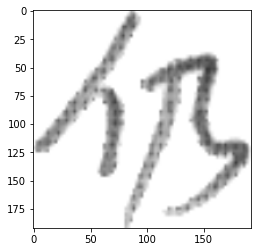

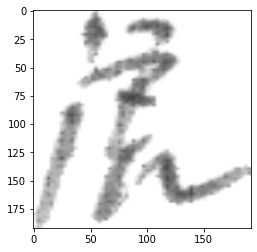

In [13]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label


for image, label in train_set.take(2):
  print(label)
  plt.figure()
  plt.imshow(image)

In [14]:
print(chart_dict[2802])

舶


In [15]:
image_label_ds = image_label_ds.map(format_example)
train_set = train_set.map(format_example)
val_set = val_set.map(format_example)
#test_set = test_set.map(format_example)

In [16]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train_set.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_batches = val_set.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
#test_batches = test_set.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 160, 160, 3])

In [17]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [18]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [19]:
base_model.trainable = False

# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [20]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

(32, 1280)
(32, 1)


In [21]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()
len(model.trainable_variables)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


2

In [23]:
initial_epochs = 10
validation_steps=20

loss0,accuracy0 = model.evaluate(val_batches, steps = validation_steps)

20/20 [==============================] - 1s 66ms/step - loss: 1561.4949 - accuracy: 0.0000e+00


In [ ]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=val_batches)

model.save_weights('./checkpoints/my_checkpoint')

Epoch 1/10
12806/27970 [============>.................] - ETA: 24:25 - loss: -367377.6562 - accuracy: 2.5379e-04

In [ ]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False


model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

model.summary()



In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1],
                         validation_data=val_batches)